In [82]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [32]:
# Load csv in dataframe
df = pd.read_csv("../../data/H2_categorical_encoded_scaled.csv")
dfo = pd.read_csv("../../data/H2_categorical_sample.csv")

In [33]:
# Check # of columns and rows imported
df.shape

(15710, 85)

In [34]:
# Check # of columns and rows imported
dfo.shape

(15710, 27)

#### Dimensionality Reduction

In [35]:
# Creates working numpy array from dataset
x_cols = df.to_numpy()

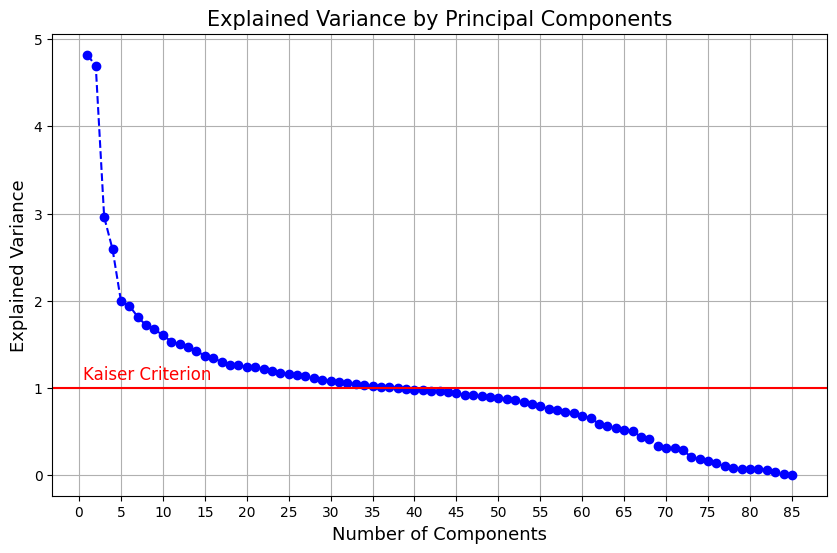

In [36]:
# Plot explained variance with additional details
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    np.arange(1, x_cols.shape[1] + 1, 1),
    explained_variance,
    marker="o",
    linestyle="--",
    color="b",
)
ax.set_title("Explained Variance by Principal Components", fontsize=15)
ax.set_xlabel("Number of Components", fontsize=13)
ax.set_ylabel("Explained Variance", fontsize=13)
ax.grid(True)
ax.axhline(y=1, color="r", linestyle="-")
ax.text(0.5, 1.1, "Kaiser Criterion", color="r", fontsize=12)
plt.xticks(np.arange(0, x_cols.shape[1] + 1, 5))
plt.show()

In [37]:
# Initializes PCA with the 3 components
pca = PCA(n_components=3)
x_3cols = pca.fit_transform(x_cols)

#### K-Means Clustering

##### Optimal K Value

In [38]:
# Creates empty list to store inertia values
iner = []
# Creates empty list to store kmeans models
kmeans_per_k = []

# Calculates inertia for the number of clusters selected 
for i in range(2, 11):
    print(f"Calculating inertia for {i} clusters")
    kmeans = KMeans(n_clusters=i).fit(x_3cols)
    iner.append(kmeans.inertia_)
    kmeans_per_k.append(kmeans)

Calculating inertia for 2 clusters
Calculating inertia for 3 clusters
Calculating inertia for 4 clusters
Calculating inertia for 5 clusters
Calculating inertia for 6 clusters
Calculating inertia for 7 clusters
Calculating inertia for 8 clusters
Calculating inertia for 9 clusters
Calculating inertia for 10 clusters


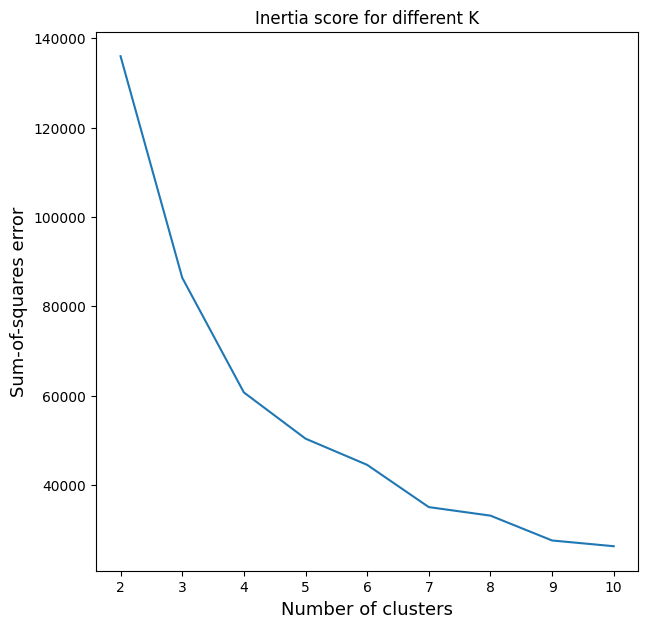

In [ ]:
# Creates x axis for the plot with number of clusters
xs = np.arange(2, 11, 1)

# Creates figure and plot
fig, ax1 = plt.subplots(figsize=(7, 7))
ax1.plot(xs, iner)
ax1.set_title("Inertia score for different K")
ax1.set_xlabel("Number of clusters", fontsize=13)
ax1.set_xticks([2, 3, 4, 5, 6, 7, 8, 9, 10])
ax1.set_ylabel("Sum-of-squares error", fontsize=13)

plt.show()

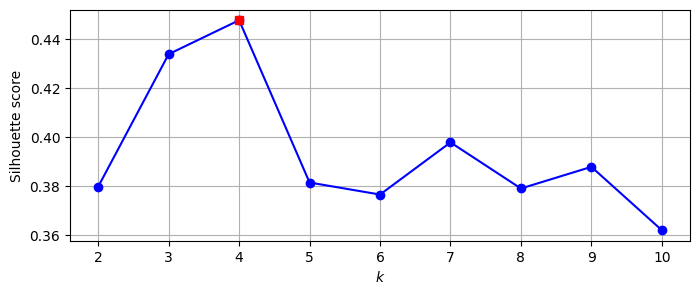

Best K: 4


In [41]:
silhouette_scores = [silhouette_score(x_3cols, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = range(2, 11)[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

print(f"Best K: {best_k}")

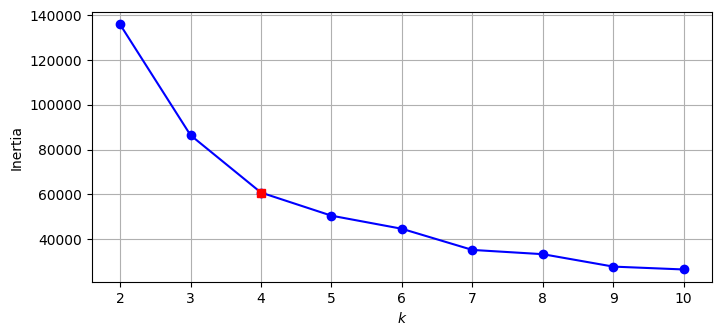

In [42]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 11), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3798389890509392
For n_clusters = 3 The average silhouette_score is : 0.43380707522416384
For n_clusters = 4 The average silhouette_score is : 0.44751833439106004
For n_clusters = 5 The average silhouette_score is : 0.45490629180051306
For n_clusters = 6 The average silhouette_score is : 0.4005063388036966
For n_clusters = 7 The average silhouette_score is : 0.4029843578746522


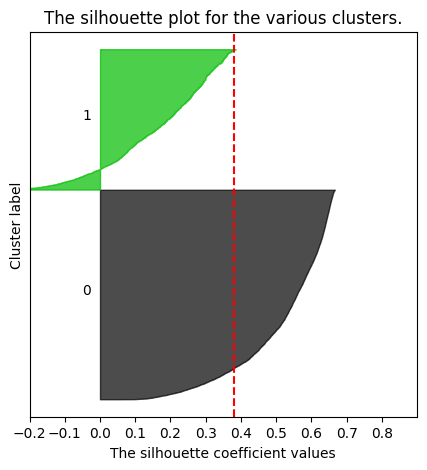

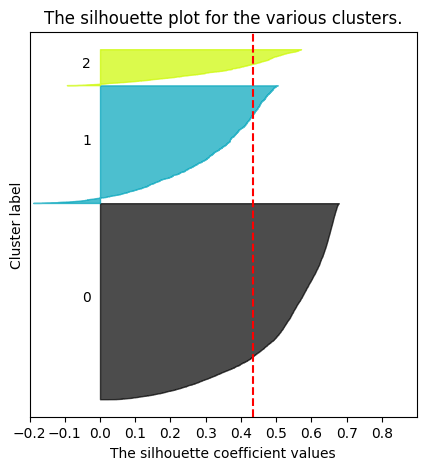

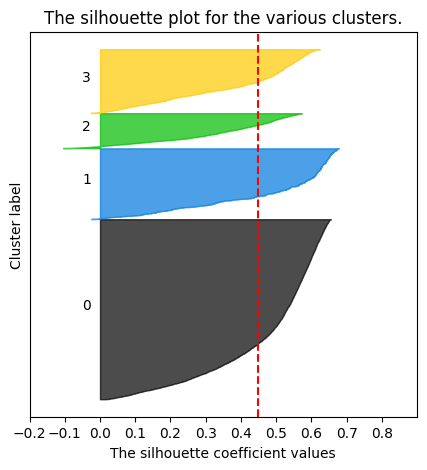

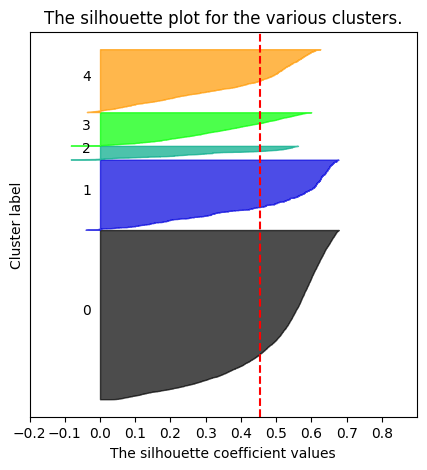

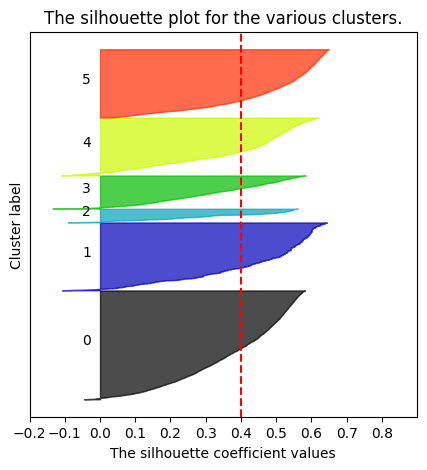

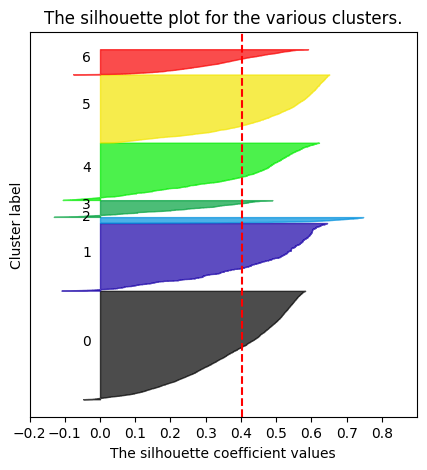

In [46]:
# Selects the number of clusters to test
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(figsize=(5, 5))

    # The silhouette coefficient can range from -1, 1 but in this case all lie within [-0.2, 0.9]
    ax1.set_xlim([-0.2, 0.9])
    ax1.margins(0.05)

    # Initialize the clusterer with n_clusters value and a random generator seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(x_3cols)

    # The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(x_3cols, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_3cols, cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

plt.show()

##### Clusters Visualization

In [49]:
# t-SNE
t_sne = TSNE(learning_rate=5, n_jobs=-1)
transformed = t_sne.fit_transform(x_3cols)
xs = transformed[:,0]
ys = transformed[:,1]

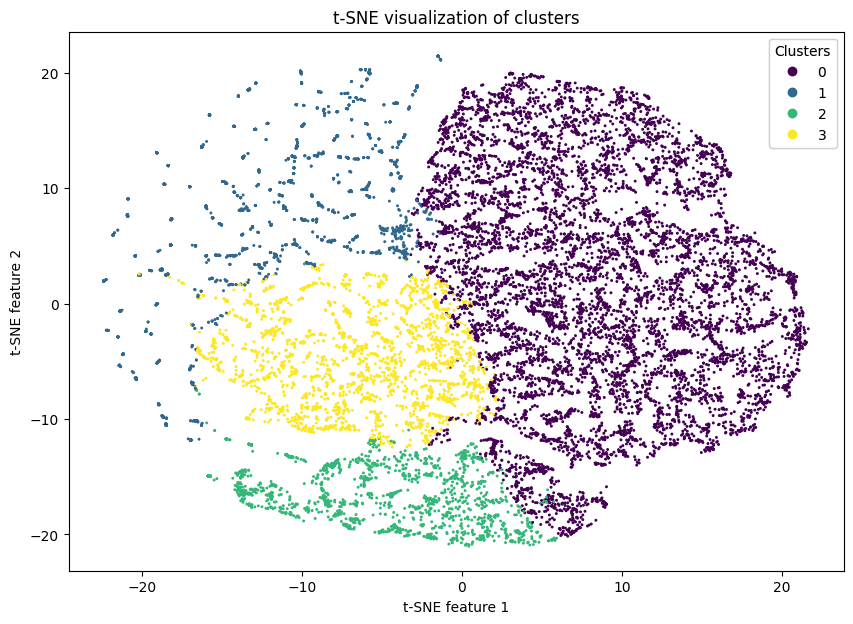

In [57]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans_4.fit_predict(x_3cols)

# Plot the t-SNE results with cluster labels
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(xs, ys, c=cluster_labels, cmap='viridis', s=5, marker='.')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title("t-SNE visualization of clusters")
ax.set_xlabel("t-SNE feature 1")
ax.set_ylabel("t-SNE feature 2")
plt.show()

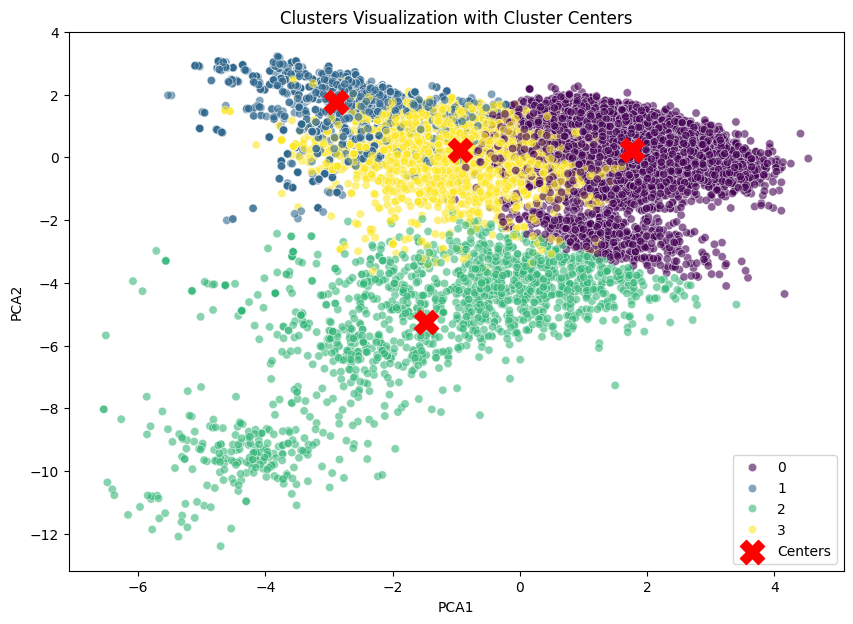

In [60]:
# Reduce the dimensionality of the data to 2D using PCA
pca_2 = PCA(n_components=2)
pca_for_wiew = pca_2.fit_transform(x_3cols)

# Create a DataFrame with the PCA results
df_pca_for_wiew = pd.DataFrame(pca_for_wiew, columns=['PCA1', 'PCA2'])
df_pca_for_wiew['Cluster'] = kmeans_4.labels_

# Reduce the dimensionality of the cluster centers to 2D using PCA
cluster_centers_pca = pca_2.transform(kmeans_4.cluster_centers_)

# Plot the clusters and their centers
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca_for_wiew, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.6)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], s=300, c='red', label='Centers', marker='X')
plt.title('Clusters Visualization with Cluster Centers')
plt.legend()
plt.show()

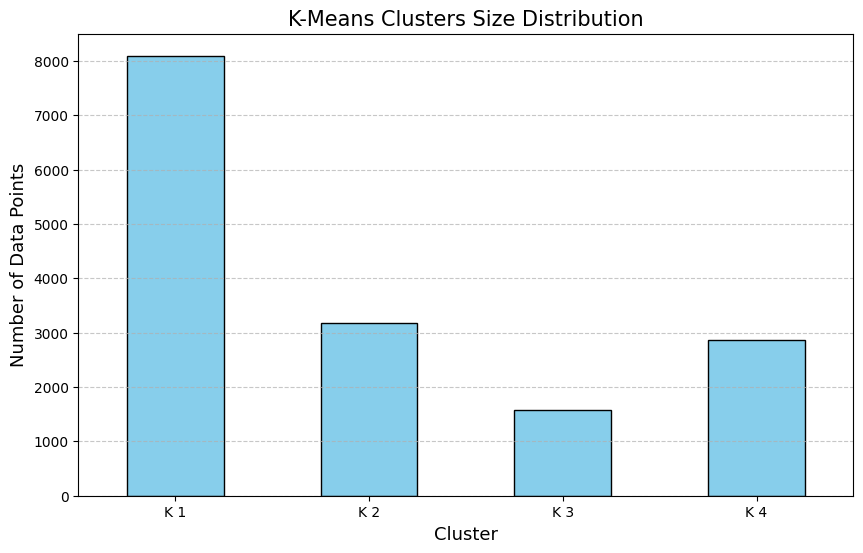

In [65]:

# Creates dataframe with the labels
kmeans_df = pd.DataFrame(cluster_labels, columns=["cluster_id"])

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
kmeans_df['cluster_id'].value_counts().sort_index().plot.bar(ax=ax, color='skyblue', edgecolor='black')
ax.set_xlabel("Cluster", fontsize=13)
ax.set_title("K-Means Clusters Size Distribution", fontsize=15)
ax.set_ylabel("Number of Data Points", fontsize=13)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(["K 1", "K 2", "K 3", "K 4"], rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [66]:
# Calculates average silhouette score for 4 clusters
silhouette_km = silhouette_score(x_3cols, cluster_labels)
print('The Silhouette coefficient for the K-Means Clustering algorithm is '+str(round(silhouette_km, 2)))

The Silhouette coefficient for the K-Means Clustering algorithm is 0.45


#### Other Clustering Models

##### DBScan

In [74]:
# Initializes and predicts labels
db_labels = DBSCAN(eps=1).fit_predict(x_3cols)

# Check the number of unique labels
unique_labels = len(set(db_labels)) - (1 if -1 in db_labels else 0)

if unique_labels > 1:
	# Calculates average silhouette coefficient
	silhouette_db = silhouette_score(x_3cols, db_labels)
	print(f'The Silhouette coefficient for the DBSCAN algorithm is {silhouette_db:.2f}')
else:
	silhouette_db = None
	print('DBSCAN did not find more than one cluster.')

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = unique_labels

# Creates dataframe of the labels for later use
dbscan_df = pd.DataFrame(db_labels, columns=['cluster_id'])

DBSCAN did not find more than one cluster.


#### Agglomerative Hierarchical Clustering

In [76]:
# Initializes and predicts labels
ac_labels = AgglomerativeClustering(n_clusters=4, linkage='ward').fit_predict(x_3cols)
# Calculates average silhouette coefficient
silhouette_ac = silhouette_score(x_3cols, ac_labels)
# Creates dataframe of the labels for later use
agglo_df = pd.DataFrame(ac_labels, columns=['cluster_id'])

The Silhouette coefficient for the Agglomerative Hierarchical Clustering algorithm is 0.43


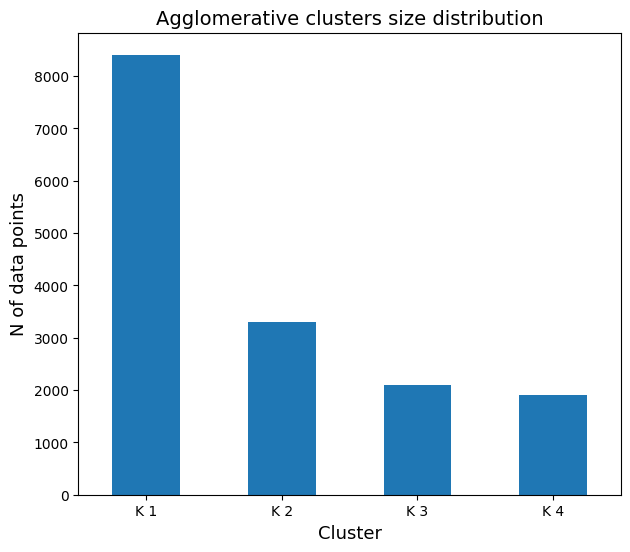

In [77]:
print(
    f"The Silhouette coefficient for the Agglomerative Hierarchical Clustering algorithm is {str(round(silhouette_ac, 2))}"
)

# Creates plot of cluster sizes
agglo_df.value_counts().sort_index().plot.bar(figsize=(7, 6))
plt.title("Agglomerative clusters size distribution", fontsize=14)
plt.xlabel("Cluster", fontsize=13)
plt.ylabel("N of data points", fontsize=13)
plt.xticks(ticks=[0, 1, 2, 3], labels=["K 1", "K 2", "K 3", "K 4"], rotation=0)
plt.show()

#### Mean-Shift Algorithm

In [78]:
# Estimates bandwidth for MeanShift algorithm
bandwidth = estimate_bandwidth(x_3cols, quantile=0.3, n_jobs=-1)

# Initializes and predicts labels
ms_labels = MeanShift(bandwidth=bandwidth).fit_predict(x_3cols)
# Calculates average silhouette coefficient
silhouette_ms = silhouette_score(x_3cols, ms_labels)

# Calculates number of clusters
n_clusters_ = len(set(ms_labels))

# Creates dataframe of the labels for later use
meansh_df = pd.DataFrame(ms_labels, columns=['cluster_id'])

The estimated bandwidth is 3.33
The number of clusters detected by the MeanShift algorithm is 2
The Silhouette coefficient for the MeanShift algorithm is 0.51


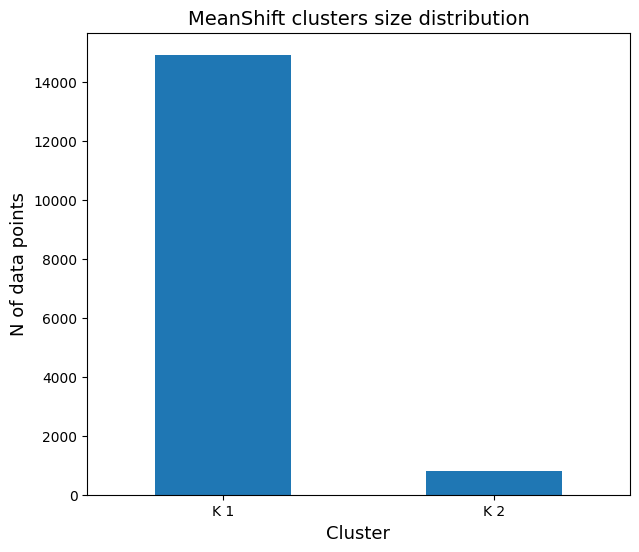

In [81]:
print('The estimated bandwidth is '+str(round(bandwidth, 2)))
print('The number of clusters detected by the MeanShift algorithm is '+str(n_clusters_))
print('The Silhouette coefficient for the MeanShift algorithm is '+str(round(silhouette_ms, 2)))

# Creates plot of cluster sizes
meansh_df.value_counts().sort_index().plot.bar(figsize=(7, 6))
plt.title('MeanShift clusters size distribution', fontsize=14)
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('N of data points', fontsize=13)
plt.xticks(ticks=[0,1], labels=['K 1','K 2'], rotation=0)
           
plt.show()

#### Expectation Maximization (EM)

In [83]:
# Initializes and predicts labels
gm_labels = GaussianMixture(n_components=4, covariance_type='full').fit_predict(x_3cols)
# Calculates average silhouette coefficient
silhouette_gm = silhouette_score(x_3cols, gm_labels)
# Creates dataframe of the labels for later use
gaussmix_df = pd.DataFrame(gm_labels, columns=['cluster_id'])

The Silhouette coefficient for the EM Clustering algorithm is 0.43


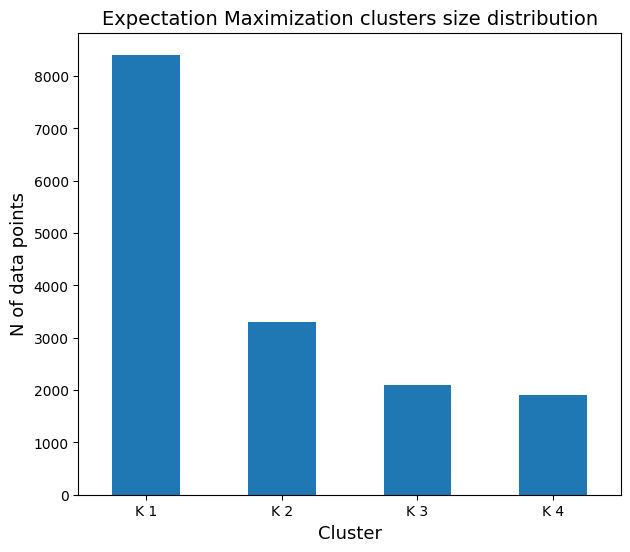

In [84]:
print('The Silhouette coefficient for the EM Clustering algorithm is '+str(round(silhouette_gm, 2)))

# Creates plot of cluster sizes
agglo_df.value_counts().sort_index().plot.bar(figsize=(7, 6))
plt.title('Expectation Maximization clusters size distribution', fontsize=14)
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('N of data points', fontsize=13)
plt.xticks(ticks=[0,1,2,3], labels=['K 1','K 2','K 3','K 4'], rotation=0)
plt.show()

#### Performance comparison based on the Silhouette Score

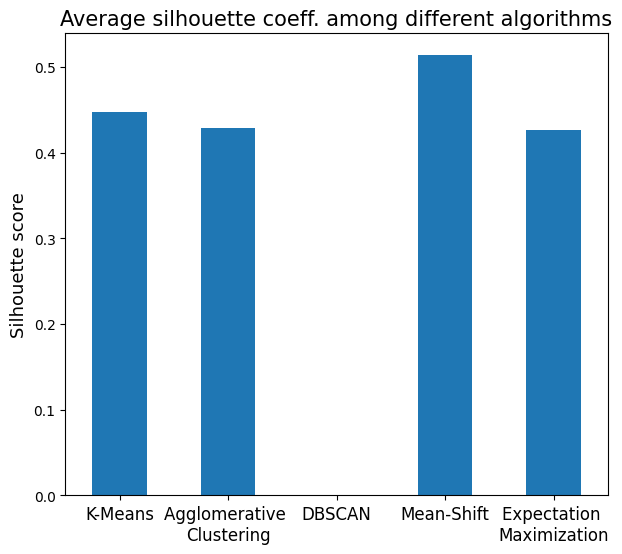

In [85]:
# Create df with results
algorithms = ['K-Means', 'Agglomerative \nClustering', 'DBSCAN', 'Mean-Shift', 'Expectation \nMaximization']
scores = [silhouette_km, silhouette_ac, silhouette_db, silhouette_ms, silhouette_gm]
algorithm_test = pd.DataFrame({'algorithm':algorithms, 'silhouette_score':scores})

# Plot results
algorithm_test.plot.bar(legend=None, figsize=(7, 6))
plt.ylabel('Silhouette score', fontsize=13)
plt.title('Average silhouette coeff. among different algorithms', fontsize=15)
plt.xticks(ticks=[0,1,2,3,4], labels=algorithms, rotation=0, fontsize=12)

plt.show()

#### Visualizing clusters

In [86]:
# Initialize the pca with 2 components and fit and transform the original dataset
pca = PCA(n_components=2)
x_new = pca.fit_transform(x_cols)

# Create df with the principal components and assign column names
pca_df = pd.DataFrame(x_new, columns=['x', 'y'])

# Joins labels to 2-component dataset
customer_seg = kmeans_df.join(pca_df)

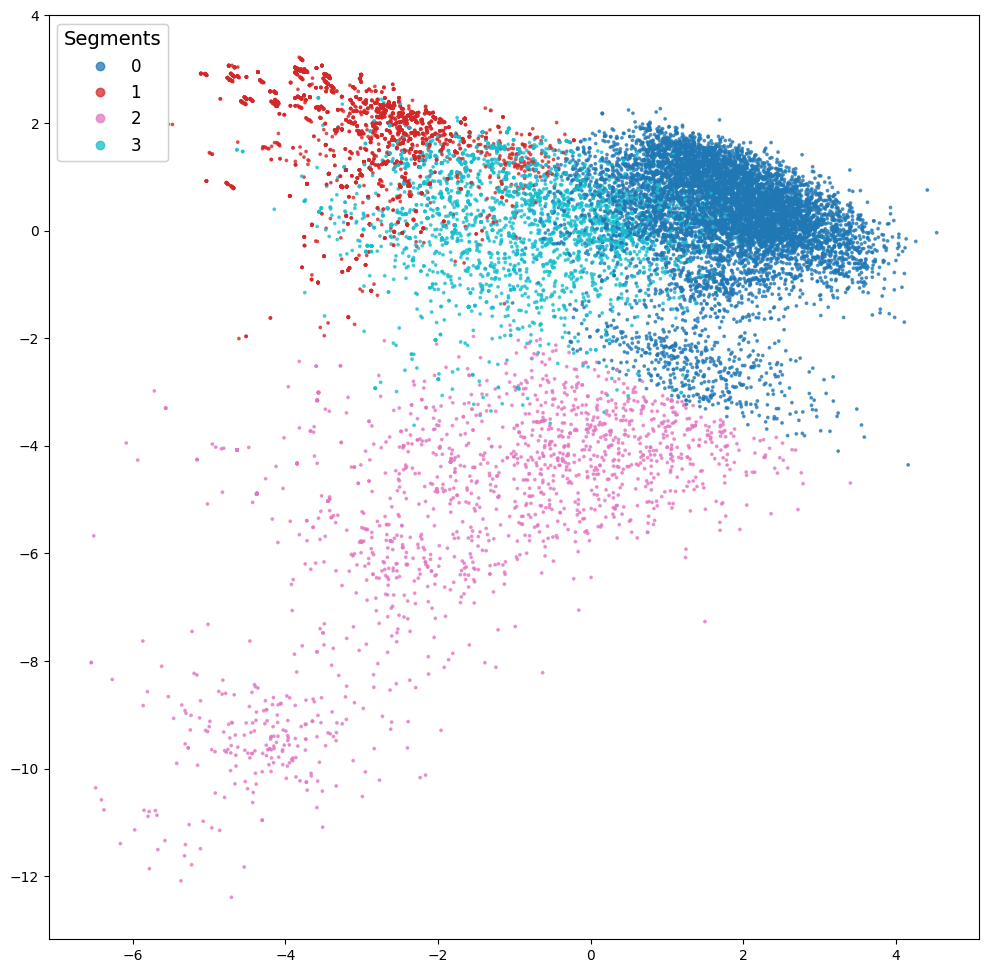

In [87]:
# Creates plot
fig, ax = plt.subplots(figsize=(12, 12))
scatter = ax.scatter('x', 'y', c='cluster_id', data=customer_seg, alpha=0.7, s=3, cmap='tab10')
legend = ax.legend(*scatter.legend_elements(), loc="upper left", title="Segments", fontsize=12, title_fontsize=14)
ax.add_artist(legend)

plt.show()

#### Customer segment profiling

In [88]:
# Reset index in original dataset
dfo.reset_index(inplace=True)
dfo.drop(['index'], axis=1, inplace=True)

# Adds cluster labels to original dataset
dfo_cat_labeled = dfo.select_dtypes(exclude='float64').join(kmeans_df)
dfo_num_labeled = dfo.select_dtypes(include='float64').join(kmeans_df)

In [89]:
# Group observations by cluster label and aggregate for most common value in categories
segments_df_cat = dfo_cat_labeled.groupby(by='cluster_id').agg(lambda x:x.value_counts().index[0])

# Group observations by cluster label and aggregate for mean value in numerical columns
segments_df_num = dfo_num_labeled.groupby(by='cluster_id').median()

In [90]:
# Shows categorical attributes per segment
segments_df_cat.T

cluster_id,0,1,2,3
ArrivalDateMonth,August,September,February,October
StaysInWeekendNights,0,0,0,0
StaysInWeekNights,2,2,1,2
Meal,BB,BB,BB,BB
Country,Other_Europe,National,National,National
MarketSegment,Online TA,Groups,Direct,Offline TA/TO
DistributionChannel,TA/TO,TA/TO,Direct,TA/TO
IsRepeatedGuest,0,0,0,0
PreviousCancellations,0,0,0,0
PreviousBookingsNotCanceled,0,0,0,0


In [91]:
# shows numerical attributes per segment
segments_df_num.T

cluster_id,0,1,2,3
LeadTime,60.0,179.0,5.0,88.0
Adults,2.0,2.0,1.0,2.0
Children,0.0,0.0,0.0,0.0
Babies,0.0,0.0,0.0,0.0
ADR,112.5,89.0,89.0,90.0


In [109]:
def plot_segment_distribution(df, column, title):
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column, hue='cluster_id', palette='viridis')
    plt.title(title, fontsize=15)
    plt.xlabel(column, fontsize=13)
    plt.ylabel('Count', fontsize=13)
    plt.legend(title='Cluster')
    plt.xticks(rotation=45)
    plt.show()

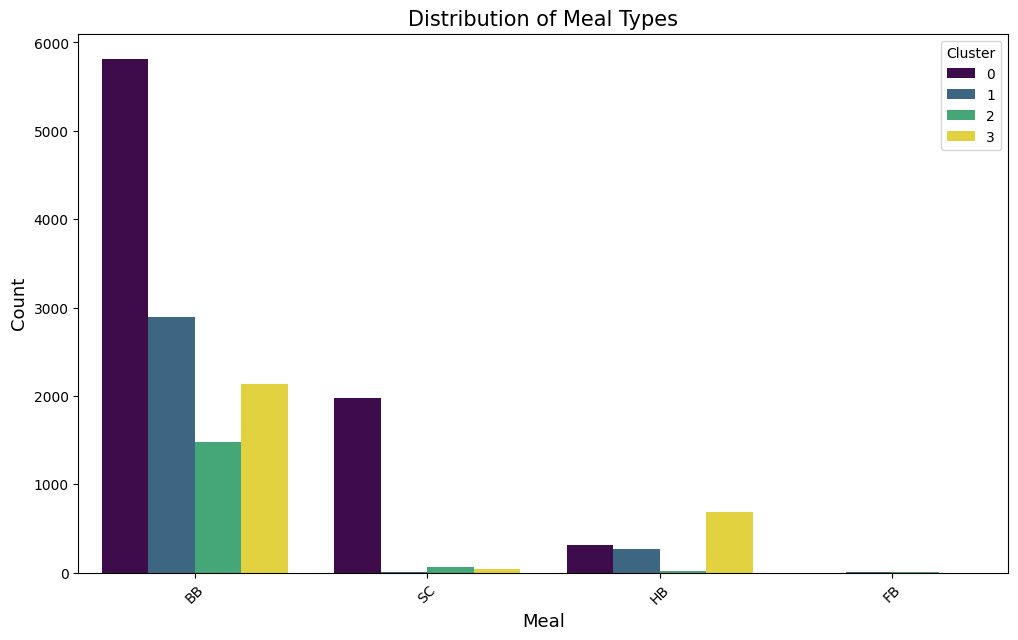

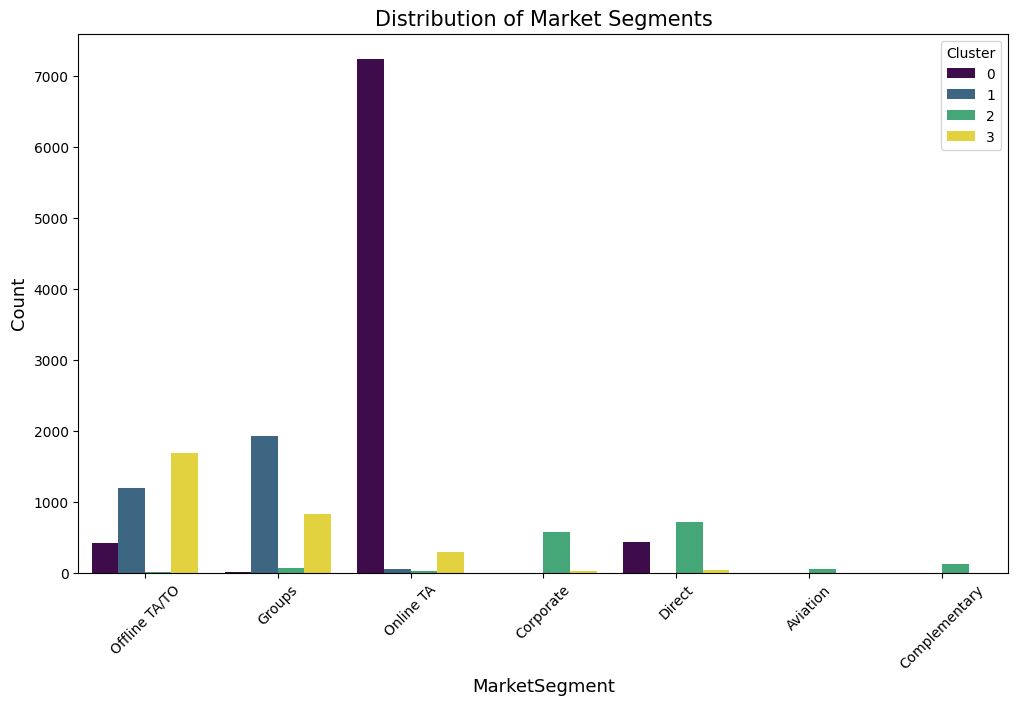

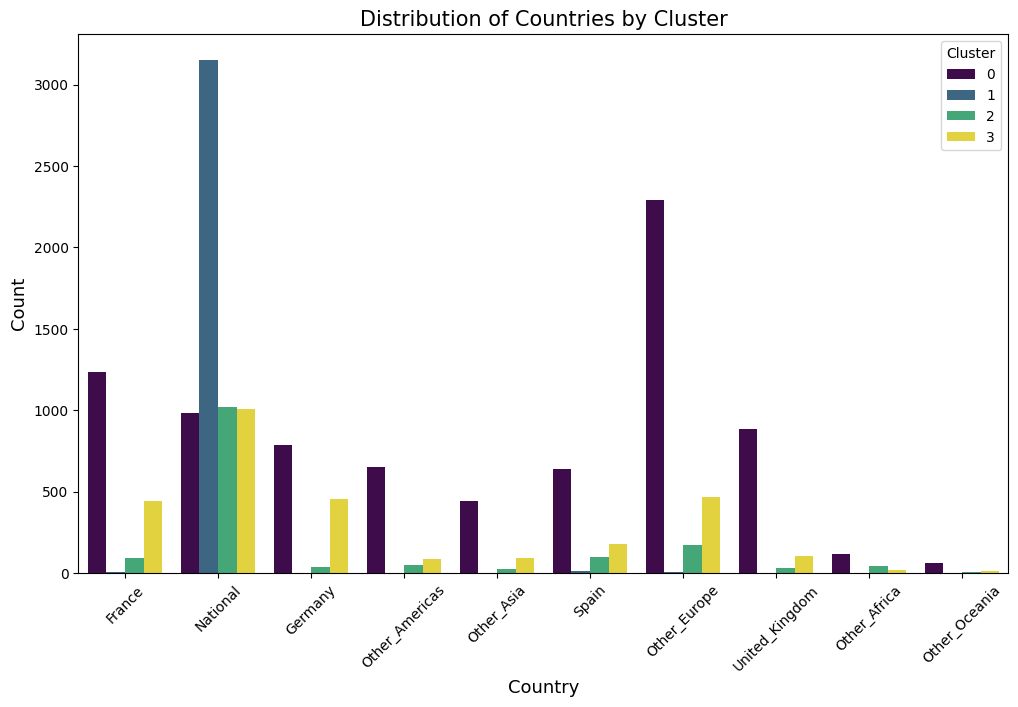

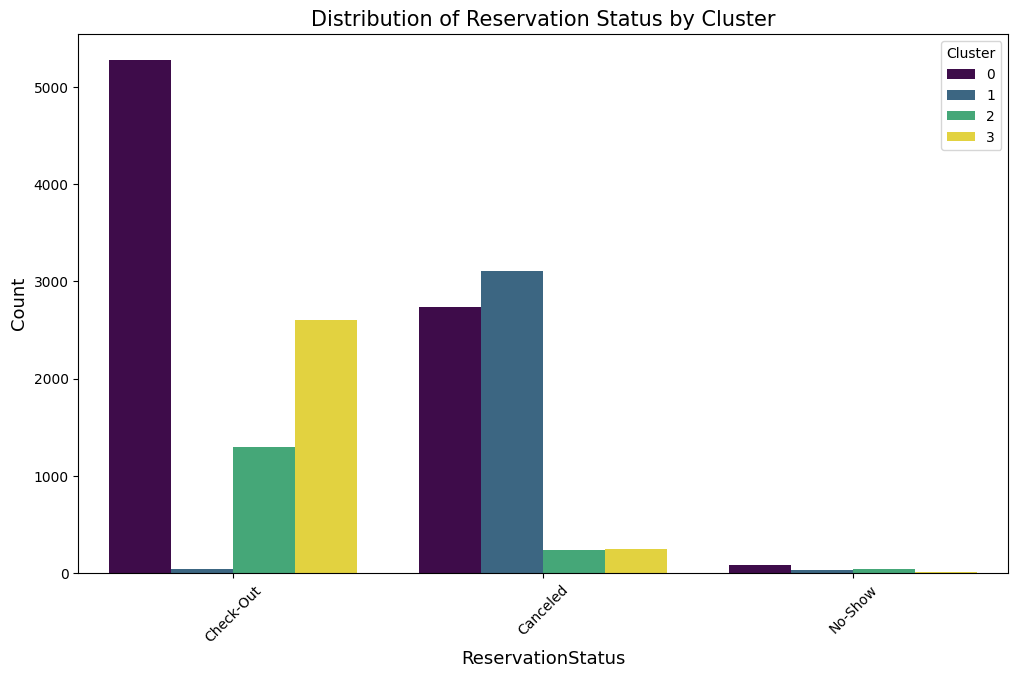

In [110]:
plot_segment_distribution(dfo_cat_labeled, 'Meal', 'Distribution of Meal Types')

plot_segment_distribution(dfo_cat_labeled, 'MarketSegment', 'Distribution of Market Segments')

plot_segment_distribution(dfo_cat_labeled, 'Country', 'Distribution of Countries by Cluster')

plot_segment_distribution(dfo_cat_labeled, 'ReservationStatus', 'Distribution of Reservation Status by Cluster')

**Cluster 0:** ***Planned and Trouble-Free Couple Accommodations***
- Average booking period (60 days)
- High ADR (112.5)
- Two adult accommodations
- No cancellations, usually successful check-outs
- **Description:** This cluster stands out with reservations made two months before the accommodation date. Accommodations are planned and trouble-free trips preferred by couples.

**Cluster 1:** ***Cancelled Long Term Group Reservations***
- Long reservation period (179 days)
- Medium ADR (89)
- Reservations that are frequently cancelled
- Belong to the online or group reservation segment
- **Description:** This cluster includes reservations that were made long in advance but are frequently cancelled. Accommodations are frequently booked by groups.

**Cluster 2:** ***Last Minute Single Person Economical Travels***
- Very short booking period (5 days)
- Low ADR (89)
- Single adult accommodations
- Successful check-out situations
- **Description:** This cluster represents single and economical accommodations made very short time before the accommodation date. It is mostly preferred for individual business or urgent travels.

**Cluster 3:** ***Mid-Term Group and Social Accommodations***
- Average booking period (88 days)
- Medium ADR (90)
- Usually group bookings
- Problem-free check-out situations
- **Description:** This cluster covers group or party accommodations that are usually made a few months before the travel plan. These types of accommodations are completed without any problems and appeal to larger social groups.
